#### 데이터 로드 및 살펴보기

In [31]:
import pandas as pd

In [32]:
# 고객 정보 로드
# 고객 정보 컬럼 ; 아이디, 나이, 성별, 직업, 주소(우편번호)
cols  = ['uid','age','sex','job','zip_code']
users = pd.read_csv( './ml-100k/u.user', sep='|', names=cols )
users.shape

(943, 5)

In [33]:
users.head()

,uid,age,sex,job,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [34]:
# 영화 정보 로드
# 영화ID, 제목, 개봉일, 비디오개봉일, imdb 주소
m_cols = ['mid','title','relese_date','video_relese_date','imdb_url']
# 실제 데이터에 컬럼이 더 많은데, 앞에서부터 잘라서 적용하고 싶다
movies = pd.read_csv( './ml-100k/u.item', sep='|', names=m_cols, 
                      encoding='latin1', usecols=range(5) )
movies.head()

,mid,title,relese_date,video_relese_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [35]:
movies.shape

(1682, 5)

- u.user : 고객 정보
- u.item : 영화 정보
- u.data : 평점 정보

In [36]:
# 평점 정보
ratings_cols    = ['uid','mid','rating','unix_timestamp']
ratings = pd.read_csv( './ml-100k/u.data', sep='\t', names=ratings_cols )
ratings.shape

(100000, 4)

In [37]:
ratings.head()

,uid,mid,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [38]:
# unix_timestamp -> 우리가 알수 있는 YYYY-MM-dd hh:mm:ss
# date라는 컬럼에 추가
ratings[ 'date' ] = pd.to_datetime( ratings[ 'unix_timestamp' ], unit='s' )

In [39]:
ratings.head()

,uid,mid,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


#### 데이터 준비/시각화/통찰

In [40]:
# 정보 병합
# movies, ratings, users
# movies, ratings => 병합 movies_ratings
movies_ratings = pd.merge( movies, ratings )
movies_ratings.head()

,mid,title,relese_date,video_relese_date,imdb_url,uid,rating,unix_timestamp,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,1997-12-31 20:48:44


In [41]:
movies_ratings.shape

(100000, 9)

In [42]:
movie_lens = pd.merge( movies_ratings, users)
movie_lens.head()

,mid,title,relese_date,video_relese_date,imdb_url,uid,rating,unix_timestamp,date,age,sex,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [43]:
movie_lens.shape

(100000, 13)

In [44]:
# 평가를 가장 많이 받은 작품 상위 10개 
movie_lens.title.value_counts()[:10]
# 인기가 아주 없는 영화는 빼고(평점 특정 개수 이하는 제외), 
# 보여지는 데이터를 기준으로 살펴보면 영화가 오래 될수록 평가를 많인 받는 경향이
# 보인다. 

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [45]:
movie_lens.title.value_counts()[-10:]

King of New York (1990)                     1
Vie est belle, La (Life is Rosey) (1987)    1
Crude Oasis, The (1995)                     1
Wife, The (1995)                            1
Dadetown (1995)                             1
Tainted (1998)                              1
Angela (1995)                               1
Here Comes Cookie (1935)                    1
Coldblooded (1995)                          1
To Cross the Rubicon (1991)                 1
Name: title, dtype: int64

In [46]:
import numpy as np

In [47]:
# 제목기준으로 데이ㅏ터를 나누는데, 평가의 개수, 평점평균을 포함한 데이터 프레임
# 인덱스에 title, 컬럼에 평가의 개수:size, 평점평균:mean
# 피벗없이 수행
# rating : 1차 레벨 컬럼, np.size, np.mean 2차 래벨의 컬럼
movie_state = movie_lens.groupby('title').agg( {'rating':[ np.size, np.mean]} )
movie_state.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [48]:
# 평점을 받는 개수가 1개인 영화, 즉 소수의 평가를 받은 영화가 많다
# 평균의 수가 적으면 노이즈가 개입되기 쉽다
# 일정 횟수 이상인 경우 (여기서는 100건 기준)만 대상으로 처리하겟다

In [49]:
# 평가의 개수가 100개 이상인 데이터만 대상 추출 -> 블리언인덱싱
best_100_over = movie_state['rating']['size'] >= 100

In [50]:
# 오름 차순 정렬하시오 -> 평균기준
# 변수명 tmp
tmp = movie_state[ best_100_over ].sort_values( by=[ ('rating','mean') ], 
                                                ascending=False)
tmp.head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [51]:
tmp.tail()

rating          
                        size      mean
title                                 
Spawn (1997)             143  2.615385
Event Horizon (1997)     127  2.574803
Crash (1996)             128  2.546875
Jungle2Jungle (1997)     132  2.439394
Cable Guy, The (1996)    106  2.339623

In [52]:
tmp.shape

(338, 2)

In [53]:
# 간단한 시각화
# 영화별 평점 개수 : x축
# 사용자별 평가 횟수 : y축 
from matplotlib import pyplot as plt
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

알수없는 시스템


In [54]:
#%matplotlib inline

In [55]:
# 사용자별 평점을 내린 개수
movie_lens.groupby('uid').size()[:10]

uid
1     272
2      62
3      54
4      24
5     175
6     211
7     403
8      59
9      22
10    184
dtype: int64

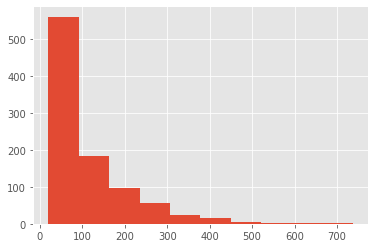

In [56]:
# 히스토그램 
plt.style.use('ggplot')
movie_lens.groupby('uid').size().sort_values( ascending=False ).hist()
# 빈도가 낮아지는 그래프 모양 -> 길게 꼬리르 늘어뜨리는 모양이다 => 롱테일분포
# "지프의 법칙"을 따르는 굴곡 모양이다
# 자연어 말뭉치 표현에 나타나는 단어들을 그 사용 빈도가 높은순으로 나열하면,
# 모든 단어의 사용 빈도는 해당 단어의 빈도 순위에 반비례한다
# 영화의 평가가 많으면, 그 사용들중에는 1회성 평가회수도 많다

In [57]:
# 사용자별 평가 회수, 평균 
user_state = movie_lens.groupby('uid').agg( { 'rating' : [ np.size, np.mean ]} )
user_state.head()

rating          
      size      mean
uid                 
1      272  3.610294
2       62  3.709677
3       54  2.796296
4       24  4.333333
5      175  2.874286

In [58]:
user_state.shape

(943, 2)

In [59]:
user_state['rating'].describe()
# 평균값 데이터를 보면, 최저 1.49점, 최대 4.87점, 25~75% 지점의 모두다 3.대에\
# 머물러 있어서, 일반적으로 (평균적으로) 3.59정도는 받는다 (3점이상는 받는다)
# 3점이하는 진짜 영화가 아닌것이다.
# 최대 점수와 최저 점수는 편중된것으로 보인다

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


#### 인수분해 머신을 이용한 추천 시스템 구성

- 행렬 인수 분해라는 기능을 일반화한 알고리즘 -> 차원축소기법
- 회소 행렬을 다룰소 있는 알고리즘
- 특징끼리 영향을 주고 받는 상호 작용 개념을 계산에 적용이 가능
- 범주형 변수를 더미 변수(파생 변수)로 변환하여 범주간 상호 작용성도 계산 가능
- 알고리즘은 회귀, 분류, 학습등도 가능  
- C++로 만들어진 libFM이라는 알고리즘이 가장 유명 -> 파이썬으로 구성된 fastFM 

##### fastFM 제공 알고리즘
- ALS : 교대 최소 제곱법
 > 장점: 예측 시간 빠름, SGD보다 하이퍼파라이터가 작다  
 > 단점: 규제 반드시(필수)
- SGD : 확률적 경사하강법 
 > 장점: 예측 시간 빠름, 대규모 데이터(빅데이터)를 빠르게 학습할수 있다  
 > 단점: 규제 반드시(필수), 하이퍼파라이터가 많다  
- MCMC : 마르코프 연쇄 몬테카를로
 > 장점: 하이퍼파라이터가 작다. 자동 규제(알아서적용)
 > 단점: 학습 시간이 다소 느림

#### 도커 도입

- 사용하고자 하는 오픈소스 알고리즘(모듈)중에는 윈도우에서 수행이 불가능한 경우가 많다. 
- 도커를 이용하여 리눅스 생태계를 만들고, 거기서 fastFM 을 설치후 주피터를 연결하여 개발을 이어가겟다.

In [ ]:
# 도커 설치
# 1. 도커 가입
- docker.com

# 2. 도커 다운로드 및 설치 (윈도우용)
- https://www.docker.com/products/docker-desktop
- 다운로드 및 설치 850MB
or 
[ 공식적으로는 window 10 home 에디션 이하 ]
- https://github.com/docker/toolbox/releases
- 다운로드및 설치
  (별도 체크박스 수정없이 다 긍정 및 확인 하면서 설치)

# 3. 도커 콘솔 가동 (docker desktop)
$ docker version

# 4. 컨테이너 이미지 다운로드 (도커 허브에서 다운로드)
$ docker pull ubuntu:latest
-> 네트워크가 않되는 사람( docker version 수행서 서버 접속 에러난 경우)
$ dockerCli.exe -SwitchDaemon
$ docker version
-> 위에 명령 수행후확인
-> 그래도 않되면 도커툴 설치후 도커툴에서 진행

or
$ docker pull ubuntu:18.04

# 5. 다운로드한 이미지 확인
$ docker images

# 6. 다운로드한 이미지 제거
$ docker rmi ubuntu:latest
- 확인
$ docker images

# 7. 컨테이너 이미지를 이용하여 컨테이너 생성 및 로그인
# 단 포트는 컨테이너를 생성할때 단 한번 세팅이 가능
$ docker run -p 8888:8888 -p 8123:8123 --name ml -i -t ubuntu:latest /bin/bash
=> -p  인바운드포트:아웃바운트포트, 1회만 세팅, 필요한 만큼 추가
=> --name 컨테이너 인스턴스의 이름
=> -i(interactive), -t(Pseudo-tty) 이 옵션 추가하면 Bash shell에 
   입력 및 출력을 수행할수 있다
=> ubuntu:latest 설치할 이미지
=> /bin/bash는 커맨드 쉘의 한 종류, 이를 사용하기 위해 명령어 입력

# 8. 리눅스에서 빠져나가기
root@$ exit

# 9. 컨테이너 인스턴스의 목록
$ docker ps -a

# 10. 컨테이너 인스턴스 가동
$ docker start ml
$ docker ps -a

# 11. 재가동
$ docker restart ml

# 12. 접속
$ docker attach ml
root@$ ...

# 13. 리눅스는 나가서, 컨테이너 인스턴스 제거
root@$ exit
$ docker rm ml
$ docker ps -a

In [ ]:
# 14. 리눅스상에서 환경 구축
root@$ apt-get update && apt-get -y upgrade

-> https://github.com/ibayer/fastFM

- 패키지 설치
root@$ apt-get -y install python3-dev libopenblas-dev git python3-pip nano wget unzip

- fastFM 소스 다운로드
root@$ cd home
root@$ git clone --recursive https://github.com/ibayer/fastFM.git
root@$ cd fastFM    

- 파이썬 라이브러리 설치
root@$ pip3 install -r ./requirements.txt

- 빌드 -> 중간에이나 끝부분에 error 가 보일수도 있다(무시)
root@$ PYTHON=python3 make

- 패키지 설치
root@$ pip3 install .
root@$ python3
>>> from fastFM import als
>>> 
>>> exit()
root@$ pip3 install pandas matplotlib jupyter

- 주피터 노트북 가동
root@$ jupyter notebook --ip=0.0.0.0 --port=8123 --allow-root --no-browser
or 
root@$ jupyter notebook --ip=0.0.0.0 --allow-root ( 기본 포트 8888 )

- 기본 PC에서 브라우저 접속
[toolbox 사용자]
도커 구동시 IP를 사용
docker is configured to use the default machine with IP 192.168.99.100
http://192.168.99.100:8123/?token=c4a28a0fec6d6eff0d3d28a9a0d62838f5f7a188cdedf686

[일반 사용자]
http://127.0.0.1:8123/?token=c4a28a0fec6d6eff0d3d28a9a0d62838f5f7a188cdedf686


In [ ]:
- 사용자가 커스텀한 이미지를 도커 허브에 업로드
- 도커 컨테이너의 이미지화 및 배포
$ docker commit --help

- 1단계 도커 컨테이너 인스턴스 가동을 중단
root@$ exit  <- 비가동중이면 해당 상황 없음
$ docker stop ml

- 2단계 도커 컨테이너 인스턴스 아이디 확인
$ docker ps -a
CONTAINER ID        IMAGE               COMMAND             CREATED             STATUS                    PORTS               NAMES
b5881a744df7        ubuntu:latest       "/bin/bash"         18 hours ago        Exited (0) 16 hours ago                       ml

- 3단계 이미지 생성
- CONTAINER ID를 복사해서, tag는 생략하면 무조건 latest 자동으로 붙는다
$ docker commit -a 'kenshi@nate.com' b5881a744df7 kenshi0216/ub_ju_base:0.1
- 확인
$ docker images

- 4단계 로그인
$ docker login

- 5단계 배포
$ docker push kenshi0216/ub_ju_base:0.1

- 컨테이너 인스턴스에 작업 파일 전송을 통해 작업을 이어간다
$ docker start ml
$ docker attach ml
root@$ cd home
root@$ mkdir dev && cd dev
root@$ jupyter notebook --ip=0.0.0.0 --port=8123 --allow-root --no-browser

- 로컬 PC <-> 도커의 인스턴스에 파일을 보내는 방법 
- 주피터를 사용할 경우 주피터 업로드를 통해 수행
- 순수 도커 명령 이용
$ docker cp 로컬PC파일경로 인스턴스네임:인스턴스상에경로
$ docker cp C:\Users\User\Documents\Dropbox\busan\py_projects\ml\extend\korea_font.py
            ml:/home/dev

In [60]:
# 모듈 사용 확인 
from fastFM import als

####  가상(더미)데이터를 이용하여 기능 처리 확인

In [61]:
# DictVectorizer : 딕셔너리의 백터화 -> 딕녀서리의 값이 문자열인 경우 백터화 처리
from sklearn.feature_extraction import DictVectorizer
import numpy as np

In [62]:
v = DictVectorizer()

In [63]:
# 더미 데이터
train = [
    { 'uid':'1', 'item':'5', 'age':19 },
    { 'uid':'2', 'item':'43', 'age':33 },
    { 'uid':'3', 'item':'20', 'age':55 },
    { 'uid':'4', 'item':'10', 'age':20 },
    { 'uid':'5', 'item':'9', 'age':44 },
]
train

[{'uid': '1', 'item': '5', 'age': 19},
 {'uid': '2', 'item': '43', 'age': 33},
 {'uid': '3', 'item': '20', 'age': 55},
 {'uid': '4', 'item': '10', 'age': 20},
 {'uid': '5', 'item': '9', 'age': 44}]

In [64]:
# 수치는 그래도 두고, 문자열만 백터화 진행
# 문자열은 범주형으로 인식하고 처리
X = v.fit_transform( train )
X.toarray()

array([[19.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [33.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [55.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [20.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [44.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [65]:
# 위의 백터화의 방식은 중복되지 않는 값의 개수만큼 변수(컬럼을)를 만들고,
# 0, 1의 이진 데이터로 그 값들을 분류하는 방식으로 백터화 처리를 한다
# 0,1 의 이진 데이터니는 학습성능이 우수하기 대문에 컬럼이 수가 많아진다는 문제점이
# 있지만, 시도해볼만한 방법 

In [66]:
# 학습 => 이들이 평가한 점수
# 평점 순서대로
y = np.array( [5.0, 1.0, 2.0, 4.0, 4.4] )

In [67]:
# 알고리즘 생성
fm = als.FMRegression( n_iter=1000, init_stdev=0.1, rank=2, 
                       l2_reg_w=0.1, l2_reg_V=0.5 )

In [68]:
# 학습
fm.fit( X, y )

FMRegression(init_stdev=0.1, l2_reg=0, l2_reg_V=0.5, l2_reg_w=0.1, n_iter=1000,
             random_state=123, rank=2)

In [69]:
# 예측
# 나이가 24세, 유저번호 6, 아이템 10번, 내릴 평점은?
tmp_dic = { 'uid':'6', 'item':'10', 'age':24 }
fm.predict( v.transform( tmp_dic ) )

array([3.78469444])

- 위의 예측값이 나왔으나, 향후 데이터가 늘어가고 모델이 갱신되는 상황이 오면
- 성능이 개선되었는지 판단하는 근거가 필요하다 
- 또한, 하이퍼파라미터 튜닝을 수행하지 않아서 => 성능을 극대화 하는 성능 평가가 필요
- 회귀모델 => 평균 제곱근 오차를 이용 => 손실함수를 통해서 판단 줄이는 방향으로 개선
- 손실함수
 > 정답에 대한 오류를 숫자로 나타나는 것  
 > 오답에 가까우면 값이 크고, 정답에 가까우면 작은 값으로 나오는 경향  
 > np.sqrt( mean_squard_error() )
 
- 평균 제곱근 오차
 > RMSE : root mean squard error
 > RMSE = 예측값과 실제값을 배열로 만들어서 차이를 제곱으로 합하고, 이것을 다시 배열           의 요소수로 나눈값의 제곱근

####  성능평가 -> 회귀 

In [70]:
def loadData( fileName, path='./ml-100k/' ):
    #print( path + fileName )
    # 훈련 데이터은 담는 그릇
    data = []
    # 평점 데이터를 담는 그릇
    y    =  []
    users = set()
    items = set()
    # 컬럼 : uid, mid, rating, unix_timestamp
    with open(path + fileName) as f:
        # 파일 포인터는 for문에 넣으면 한줄씩 리딩
        for line in f:
            #print( line.split('\t') )
            # 리스트를 튜플을 분해해서 변수로 받는 형식을 동일하게 적용하면
            # 리스트이 각 맴버들이 변수에 순서대로 들어가서 변수가 생성된다
            (uid, mid, rating, ts) = line.split('\t')
            #print( uid, mid, rating, ts  )
            # 훈련용 데이터를 받아줘야 => [ {}, {}, {}, ..]
            # uid, mid => 다 문자열이어야 한다 => 백터화 할거라서
            data.append( { 'uid':uid, 'mid':mid } )
            y.append( float(rating) )
            users.add( uid )
            items.add( mid )
            #break
    
    # users, items : 현 데이터의 유저 목록, 아이템 목록만 모은것, 중복제거
    return ( data, np.array(y), users, items )

In [71]:
# 데이터로드 및 원하는 자료구조로 편성  => 함수
(dev_data, y_dev, dev_users, dev_items) = loadData('ua.base')
dev_data[:2], y_dev[:2], len(dev_users), len(dev_items)

([{'uid': '1', 'mid': '1'}, {'uid': '1', 'mid': '2'}],
 array([5., 3.]),
 943,
 1680)

In [72]:
(test_data, y_test, test_users, test_items) = loadData('ua.test')

In [73]:
test_data[:2], y_test[:2], len(test_users), len(test_items)

([{'uid': '1', 'mid': '20'}, {'uid': '1', 'mid': '33'}],
 array([4., 4.]),
 943,
 1129)

In [74]:
# dev_data -> 백터화 : X_dev(변수명)
v = DictVectorizer()

In [75]:
# 훈련용 데이터의 백터화
X_dev = v.fit_transform( dev_data )

In [76]:
X_dev.shape, len( dev_data)

((90570, 2623), 90570)

In [77]:
# 테스트용 데이터의 백터화
X_test = v.fit_transform( test_data )

In [78]:
X_test.shape

(9430, 2072)

In [79]:
# y_test (평점) 표준 편차 현재값 기억 -> 이값을 하이퍼파라미터 튜닝을 통해서 
# 예측을 수행 => 평균제곱 오차에 대한 값이 이것보다 작아지면 성능이 개선되었다
# 맨 처음의 기준치
np.std( y_test )

1.120180145761465

In [80]:
# 훈련 => 훈련용 + 검증용 분리
# X_dev  => 훈련용 => 훈련용, 검증용 분리
# X_text => 예측용 및 성능평가 수행
from sklearn.model_selection import train_test_split

In [81]:
# 실험이나 테스트 수행시 램덤값일 지정하면 시드가 고정이 되서, 항상 같은 분류로 섞인다
X_train, X_dev_test, y_train, y_dev_test = train_test_split( X_dev, 
                                            y_dev, test_size=0.1, random_state=42 )

In [82]:
X_train.shape, X_dev_test.shape

((81513, 2623), (9057, 2623))

In [83]:
len(y_train), len(y_dev_test)

(81513, 9057)

In [84]:
type(y_train)

numpy.ndarray

In [85]:
# 데이터 준비 완료

- MCMC
> 하이퍼파라미터 작다  
> 학습시간이 많이 걸려서, 실시간 처리를 원한다면 SGD를 사용  
> 학습후 예측을 동시에 수행 -> 함수도 제공

In [86]:
from sklearn.metrics import mean_squared_error
from fastFM import mcmc

In [87]:
# 하이퍼파라미터
n_tier    = 300 # 테스트의 총 시도회수
step_size = 1   # 예측 및 평가 수행시 데이터를 사용하는 간격
seed      = 123
rank      = 4

In [88]:
# mcmc 알고리즘 생성
fm = mcmc.FMRegression( n_iter=0, rank = rank, random_state=seed )

In [89]:
# 학습및 예측
fm.fit_predict( X_train, y_train, X_dev_test )

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
# 하이퍼파라미터값을들 받은 배열
np.zeros( ( n_tier , (3 + 2* rank) ), dtype=np.float64 )

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
# 손실함수 결과를 담을 리스트
rmse_test = []
# 하이퍼파라미터 데이터를 담을 그릇 -> 0행렬, 배열(다 기본값이 0)
# 11 = 3 + 2* rank
# 300 * 11 배열(행렬)
hyper_params_storage = np.zeros( ( n_tier , (3 + 2* rank) ), dtype=np.float64 )
# n_tier를 1<= x <300
for n, i in enumerate(range(1, n_tier)):
    # n : 0 ~  인덱스
    # i : 1 ~ 299 연속수
    #print( n, i )
    # 시드 교체
    fm.random_state = i * seed # 1*123, 2*123, ... 299*123
    # 학습 및 예측
    y_pred = fm.fit_predict( X_train, y_train,  X_dev_test, n_more_iter=step_size )
    # 손실 함수를 계산에서 리스트에 담는다
    rmse_test.append( np.sqrt( mean_squared_error( y_pred, y_dev_test ) ) )
    # 하이퍼파라미터 값들을 담아둔다
    #print( fm.hyper_param_, type(fm.hyper_param_), fm.hyper_param_.shape )
    # numpy의 특정 row값을 치환 => Dataframe의 iloc가 표현적으로 같다
    hyper_params_storage[ n, : ] = fm.hyper_param_
    #break

In [92]:
print( np.std( y_test ), '-> 하이퍼파라미터적용후 최젃성능 ->', np.min( rmse_test )  )

1.120180145761465 -> 하이퍼파라미터적용후 최젃성능 -> 0.8959692745565979


In [93]:
# 사용자아이디, 영화 아이디 <-> 평점  관계에 대한 회귀알고리즘을 적용하여 상관성
# 체크 -> 이를 판단하는 지표로 평균 제곱근 오차를 이용 =>
# 손실함수를 통해서 판단 줄이는 방향으로 개선 (하이퍼파라미터 튜닝, 난수값 조정)

# 회귀 알고리즘 => 인수분해머신 기능을 지원하는 libFM을 사용=>C++=> 파이썬버전
# fastFM을 사용한것이다 => 오픈소스알고리즘

In [94]:
from matplotlib import pyplot as plt

In [95]:
# 시각화를 하기 위해서 step_size(간격)이 벌어지면 데이터가ㅣ 채워지는 인덱스도 
# 벌어지므로, 자동으로 대응하기 위해서 step_size를 구성 했다 
x = np.arange( 1, n_tier ) * step_size
x.shape

(299,)

In [96]:
hyper_params_storage[:-1, 0].shape

(299,)

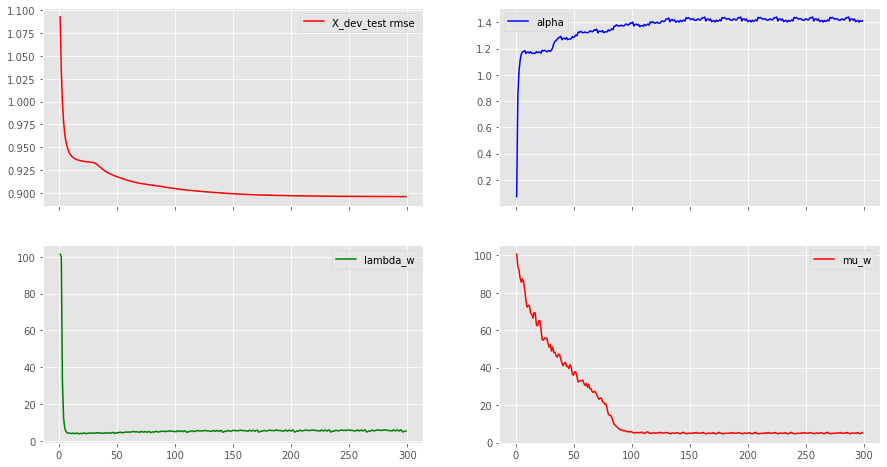

In [97]:
fig, axes = plt.subplots( nrows=2, ncols=2, sharex=True, figsize=(15, 8) )

# rmse      : 평균제곱근오차
axes[0, 0].plot(  x, rmse_test, label='X_dev_test rmse', color='r' )
axes[0, 0].legend()

# alpha     : 하이퍼파라미터 중 0번째
axes[0, 1].plot( x, hyper_params_storage[:-1, 0], label='alpha', color='b' )
axes[0, 1].legend()

# lambda_w : 하이퍼파라미터 중 1번째
axes[1, 0].plot( x, hyper_params_storage[:-1, 1], label='lambda_w', color='g' )
axes[1, 0].legend()

# mu_w     : 하이퍼파라미터 중 3번째
axes[1, 1].plot( x, hyper_params_storage[:-1, 3], label='mu_w', color='r' )
axes[1, 1].legend()

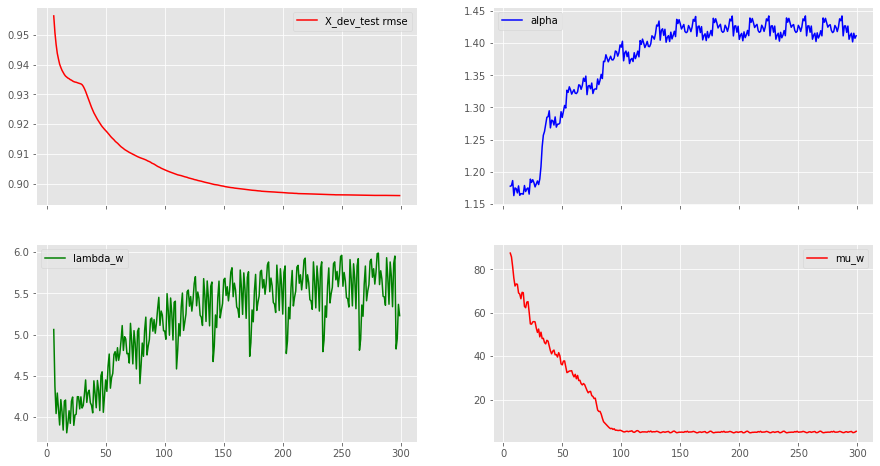

In [98]:
# 값의 편차가 급격히 차이가 나면 의미없는 부분이나, 큰부분은 배제 시키면
# 편차가 큰 초기값들 여기서는 ~5까지를 배제
# 집중해야된 부분에 정확하게 볼수 잇다

fig, axes = plt.subplots( nrows=2, ncols=2, sharex=True, figsize=(15, 8) )

# rmse      : 평균제곱근오차
axes[0, 0].plot(  x[5:], rmse_test[5:], label='X_dev_test rmse', color='r' )
axes[0, 0].legend()

# alpha     : 하이퍼파라미터 중 0번째
axes[0, 1].plot( x[5:], hyper_params_storage[5:-1, 0], label='alpha', color='b' )
axes[0, 1].legend()

# lambda_w : 하이퍼파라미터 중 1번째
axes[1, 0].plot( x[5:], hyper_params_storage[5:-1, 1], label='lambda_w', color='g' )
axes[1, 0].legend()

# mu_w     : 하이퍼파라미터 중 3번째
axes[1, 1].plot( x[5:], hyper_params_storage[5:-1, 3], label='mu_w', color='r' )
axes[1, 1].legend()

- 반복 구간이 특정 수치를 넘어가면  ex)  mu_w 는 100, alpha는 150 지점
- 안정화 되간다 => 값을 수렴하고 있다
- 검증 데이터의 표준편차가 1.2였는데, 예측 시점에서 평균제곱은 오차는 0.89까지 감소되었다
- 위의 하이퍼파라미터는 random_state를 조정한것 -> rank 나 다른요소도 검토하면 결과치는 다를수 있다 -> 하이퍼파라미터 튜닝 기법을 이용하여 자동화 처리 수행하는게 좀더 효율적
- 현 시점에서 시도를 해볼수 있는 향상 방법 => 평점 1.0 ~ 5.0 사이 존재 -> 정규화
- 평점은 0 ~ 1사이로 조정 (스케일러) 성능 향상을 좀 꽤할수 있다

- 상황인지추천 기법
- 다양한 특성 조합을 바꿔가면서, 테스트를 수행 => 예측의 성능을 높일수 있는 검증수행가능
- 사용자아이디와 아이템아이디만을 이용하여 예측모델을 구축 했는데, 기타 특성을 조합해서 예측성능을 높일수 있다면 => 기본 정보 이외의 티가 정보를 활용하여 추천을 수행할수 있다면 이것을 상화인지추천 이라고 정의 -> fastFM 지원 여러 특성 조합을 테스트할수 있다

In [99]:
movie_lens.columns

Index(['mid', 'title', 'relese_date', 'video_relese_date', 'imdb_url', 'uid',
       'rating', 'unix_timestamp', 'date', 'age', 'sex', 'job', 'zip_code'],
      dtype='object')

In [100]:
movie_lens.head(1)

,mid,title,relese_date,video_relese_date,imdb_url,uid,rating,unix_timestamp,date,age,sex,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076


In [119]:
def getYear(x):
    #print( type(x) )
    # 데이터를 안전하게 획듟할려고 조건문을 쓰지면, 사전에 NAN으로 판단되는 
    # 결측치는 미리 제거하고 진행해야 한다. 이런 경우에는 조건문이 굳이 필요 없음
    if x:
        t = str(x).split( '-' )
        if len(t) == 3:
            return t[2]
    
t = movie_lens['relese_date'].apply( getYear )

In [116]:
# 필요한 컬럼 추가
movie_lens['year'] = movie_lens['relese_date'].apply( getYear )

In [117]:
# 컬럼 조합 후보 => 컬럼추가 , 순서 조합 등 다양한 시도
candidate_columns = [
    ['uid', 'mid', 'age', 'sex', 'year', 'rating'],
    ['uid', 'mid', 'sex', 'year', 'rating'],
    ['uid', 'mid', 'age', 'sex', 'rating'],
    ['uid', 'mid', 'rating'],
]

In [118]:
movie_lens[ candidate_columns[0] ].head(2)

,uid,mid,age,sex,year,rating
0,308,1,60,M,1995,4
1,308,4,60,M,1995,5


In [120]:
# 특정 컬럼 문자열로 타입 전환
movie_lens[ 'uid' ] = movie_lens[ 'uid' ].astype( str )
movie_lens[ 'mid' ] = movie_lens[ 'mid' ].astype( str )

In [121]:
# 하이퍼파라미터 고정
rmse_test = []
n_iter    = 500
seed      = 123
rank      = 8

In [141]:
# 정규화 모듈
from sklearn.preprocessing import StandardScaler

In [142]:
col = candidate_columns[0]
filtered_movie_lens = movie_lens[ col ].dropna()
v = DictVectorizer()
tmp = list(filtered_movie_lens.drop('rating', axis=1).T.to_dict().values())
X_ori_addFeature = v.fit_transform( tmp )
y_ori_addFeature = filtered_movie_lens['rating'].to_list()
X_train, X_test, y_train, y_test = train_test_split( X_ori_addFeature, y_ori_addFeature, test_size=0.1, random_state=42 )

In [143]:
scaler = StandardScaler()

In [146]:
y_train[:2], type(y_train)

([4, 5], list)

In [148]:
np.array(y_train).reshape(-1,1)

array([[4],
       [5],
       [5],
       ...,
       [4],
       [2],
       [3]])

In [155]:
# ravel()는 일차로 다시 펼쳐주는 함수 <-> reshape()
# 6.평점 정규화
y_train_norm = scaler.fit_transform( np.array(y_train).reshape(-1,1) ).ravel()
# 검토 사항 값의 범위

In [156]:
# 7. 알고리즘 생성
fm = mcmc.FMRegression( n_iter=n_iter, rank=rank, random_state=seed )

In [157]:
# 8. 훈련하면서 예측
y_pred = fm.fit_predict( X_train,  y_train_norm, X_test )

In [158]:
# 9. 손실함수 결과 추가
# scaler.inverse_transform() <-> scaler.fit_transform()
# 평균 제곱근 오차를 수행하기 위해서 입력 데이터들이( 예측값, 실제값) 형태가 동일
# 해야 하고, 값의 범주도 동일해야 하므로, 정규화된 데이터를 실제값과 같은 범주에 
# 들어오겠끔 inverse_transform()을 통해서 변환 처리
rmse_test.append( np.sqrt( mean_squared_error( scaler.inverse_transform( y_pred.reshape(-1,1)  ), y_test ) ) )

In [159]:
rmse_test

[0.8868912332560999]

In [160]:
rmse_test = []
# 조합별 반복
for col in candidate_columns:
    #print( movie_lens[ col ].head(1) )
    # 1. 결측 제거
    filtered_movie_lens = movie_lens[ col ].dropna()
    
    # 2. 백터화 도구 생성
    v = DictVectorizer()
    # rating을 제거 => 사본처리 => dict화 {} => 리스트에 맴버 [{}, {} ] => 백터화
    
    # 3. 데이터를 백터화 할수 있게 [ {}, {}] 구조로 변환
    # [:2] => 데이터가 10만개라서, 회전, 딕셔너리화 할때 오래걸리니까, 
    # 데이터를 샘플로 줄여서 작업 진행 => 모듈 완서잉 끝나면 제거
    #print( list(filtered_movie_lens[:2].drop('rating', axis=1).T.to_dict().values()) )
    tmp = list(filtered_movie_lens.drop('rating', axis=1).T.to_dict().values())
    
    # 4. 백터화
    X_ori_addFeature = v.fit_transform( tmp )
    #print( X_ori_addFeature 
    y_ori_addFeature = filtered_movie_lens['rating'].to_list()
    # train_test_split() 함수에 넣는 데이터의 형식으로 서로 맞춰주기 위해 리스트화 처리
    # 일반적으로 넣어 보고 에러나면 보정하는 방법도 잇음
    print( type(X_ori_addFeature), type(y_ori_addFeature) )
    
    # 5. 데이터 분류
    X_train, X_test, y_train, y_test = train_test_split( X_ori_addFeature, 
                                y_ori_addFeature, test_size=0.1, random_state=42 )
    
    # 6. 평점 정규화
    scaler = StandardScaler()
    y_train_norm = scaler.fit_transform( np.array(y_train).reshape(-1,1) ).ravel()
    
    # 7. 알고리즘 생성
    fm = mcmc.FMRegression( n_iter=n_iter, rank=rank, random_state=seed )
    
    # 8. 훈련하면서 예측
    # 훈련데이터, 훈련데이터의 답안, 테스트데이터 순서로 입력
    y_pred = fm.fit_predict( X_train,  y_train_norm,  X_test )
    
    # 9. 손실함수 결과 추가
    # scaler.inverse_transform() <-> scaler.fit_transform()
    # 평균 제곱근 오차를 수행하기 위해서 입력 데이터들이( 예측값, 실제값) 형태가 동일
    # 해야 하고, 값의 범주도 동일해야 하므로, 정규화된 데이터를 실제값과 같은 범주에 
    # 들어오겠끔 inverse_transform()을 통해서 변환 처리
    rmse_test.append( np.sqrt( mean_squared_error( scaler.inverse_transform( y_pred.reshape(-1,1)  ), y_test ) ) )

    #break 

<class 'scipy.sparse.csr.csr_matrix'> <class 'list'>
<class 'scipy.sparse.csr.csr_matrix'> <class 'list'>
<class 'scipy.sparse.csr.csr_matrix'> <class 'list'>
<class 'scipy.sparse.csr.csr_matrix'> <class 'list'>


In [162]:
# 위에서 초기화를 않해서 결과가 하나 더 있다 
rmse_test

[0.8868912332560999, 0.8834404187907334, 0.8922375852811406, 0.887744557428427]

In [163]:
# x축에는 A, B, C, D
# y축에는 값
# 바차트
# y값의 제한, 0.88~0.90 사이로 제한
index = np.arange( len(rmse_test[1:] ) )
index

array([0, 1, 2, 3])

(0.88, 0.895)

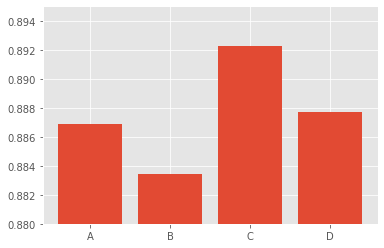

In [166]:
bar = plt.bar( index, height=rmse_test[1:] )
plt.xticks( index, ('A','B','C','D') )
plt.ylim( (0.88, 0.895) )
# B 조합 => ['uid', 'mid', 'sex', 'year', 'rating']이 가장 좋은 성능을 내고 있다
# 다양한 특성 조합을 간단하게 변경해 가면서 성능 평가를 수행
# 어떤 특성을 추가하면 성능을 높일수 있는지 쉽게 검증
# uid, mid 이외에 정보를 활용하여 추천을 수행하는 추천모델을 만드는 방식=>상황인지추천